## Q.1 Implement the generalized equation for finding the gradient of m-samples, each having n-features. Also, implement the gradient descent approach assuming a constant learning rate.



In [1]:
import numpy as np

# y in R^m (target values for all the samples)
# w in R^n (vector of parameters)
# dJ(w)/dw = 1/m \sum (h_w(x^(i)-y^(i))*x^(i)

def compute_gradient(X, y, W):
    m = len(y)
    # print(X.shape)
    predictions = np.dot(X, W)
    # print(predictions.shape)
    errors = predictions - y
    gradient = (1/m) * np.dot(X.T, errors)
    return gradient

# cost_values

def steepest_grad_descent(X, y, W, alpha, max_iteration=2000, epsilon=1e-5):
    cost_values = []
    for i in range(max_iteration):
        grad = compute_gradient(X, y, W)
        W = W - alpha * grad
        cost = compute_cost(X, y, W)
        cost_values.append(cost)
        
        if np.linalg.norm(grad) < epsilon:
            break
    return W, cost_values

def compute_cost(X, y, W):
    m = len(y)
    J = (1/(2*m)) * np.sum((np.dot(X, W) - y)**2)
    return J

## Q.2 Using the code developed for problem 1, do the linear regression for the univariate problem using the attached data file univariate_linear_regression.csv. Plot the cost function (both as surface as well as contour) as well as the best fit line. 

In [2]:
import pandas as pd
linear_reg_df = pd.read_csv('univariate_linear_regression.csv')

In [3]:
linear_reg_df

,x,y
0,-1.932,-13.569
1,-2.953,-19.207
2,8.879,17.665
3,9.259,15.835
4,3.033,-0.495
...,...,...
195,5.415,7.125
196,3.333,0.857
197,-3.493,-20.700
198,8.839,15.153


In [4]:
# Read data
X = linear_reg_df['x'].values.reshape(-1, 1)  # Reshape X to have proper dimensions
y = linear_reg_df['y'].values.reshape(-1, 1)
# X = linear_reg_df['x']
# y = linear_reg_df['y']

print(X.shape)
print(y.shape)

(200, 1)
(200, 1)


In [5]:
# Number of samples
m = len(X)

# Add bias term to X
X_b = np.c_[np.ones((m, 1)), X]
print(X_b.shape)

# Number of features
n = X_b.shape[1]

# Initialize w with zeros
w = np.zeros((n, 1)) 

(200, 2)


In [6]:
# Set hyperparameters
alpha = 0.01

# Perform gradient descent
w_best, cost_values = steepest_grad_descent(X_b, y, w, alpha, max_iteration=2000, epsilon=1e-5)
print('W:',w_best)

W: [[-10.06513047]
 [  2.97262302]]


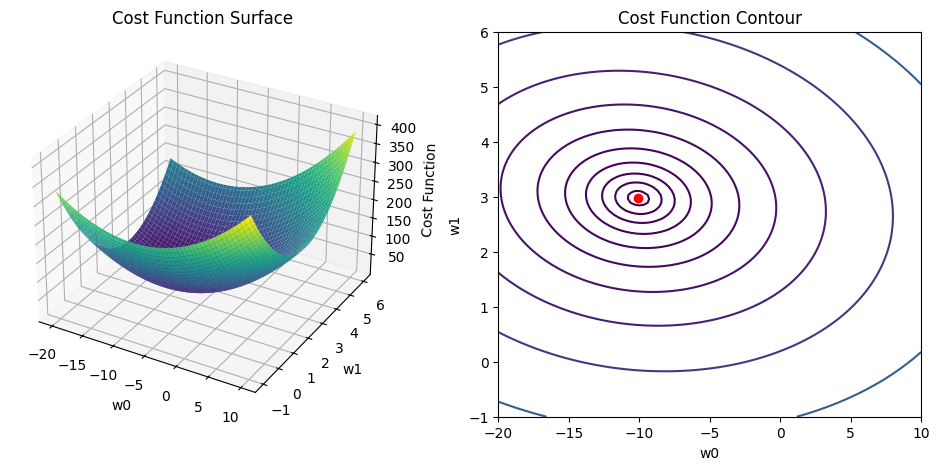

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Plot cost function as surface and contour
w0_vals = np.linspace(-20, 10, 100)
w1_vals = np.linspace(-1, 6, 100)

J_vals = np.zeros((len(w0_vals), len(w1_vals)))

for i, w0 in enumerate(w0_vals):
    for j, w1 in enumerate(w1_vals):
        w_tmp = np.array([[w0], [w1]])
        J_vals[i, j] = compute_cost(X_b, y, w_tmp)

# Surface plot of loss 
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(121, projection='3d')
w0_grid, w1_grid = np.meshgrid(w0_vals, w1_vals)
ax1.plot_surface(w0_grid, w1_grid, J_vals.T, cmap='viridis')
ax1.set_xlabel('w0')
ax1.set_ylabel('w1')
ax1.set_zlabel('Cost Function')
ax1.set_title('Cost Function Surface')

# Contour plot
ax2 = fig.add_subplot(122)
ax2.contour(w0_grid, w1_grid, J_vals.T, levels=np.logspace(-2, 3, 20))
ax2.plot(w_best[0], w_best[1], 'ro')
ax2.set_xlabel('w0')
ax2.set_ylabel('w1')
ax2.set_title('Cost Function Contour')

plt.show()


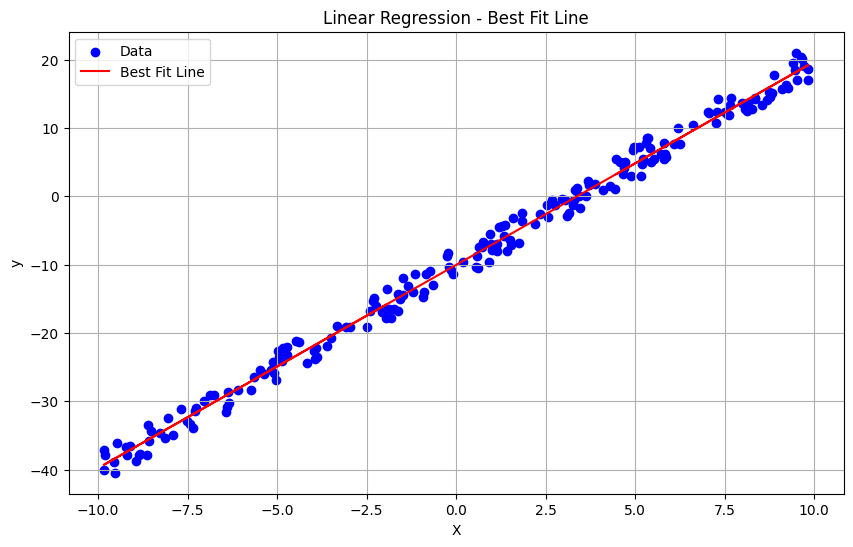

In [8]:
# Plot the best fit line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, np.dot(X_b, w_best), color='red', label='Best Fit Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression - Best Fit Line')
plt.legend()
plt.grid(True)
plt.show()

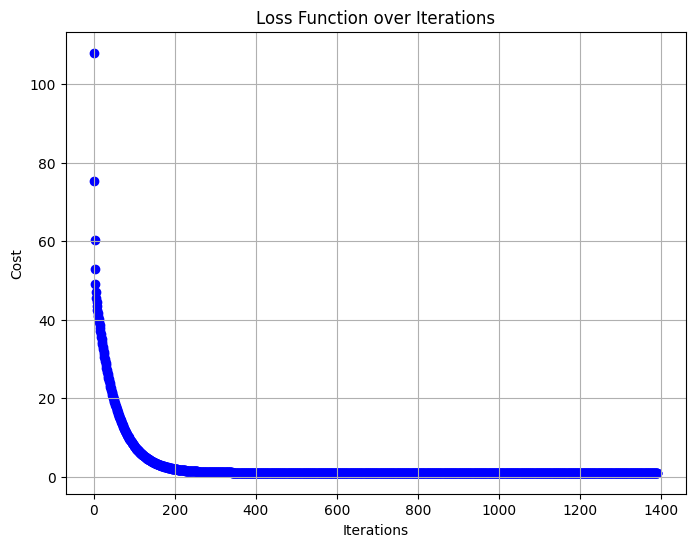

In [9]:
from array import array

costs = np.array(cost_values)# convert a list to array

# Plot the loss function over iterations
plt.figure(figsize=(8, 6))
plt.scatter(np.arange(len(costs)), costs, color='blue')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Loss Function over Iterations')
plt.grid(True)
plt.show()

## Q.3 Using the code developed for problem 1, do the linear regression for the multivariate problem using the attached data file heart.data.csv. Plot the best fit plane for the given data. Can you also interpret the result (taking one independent variable at a time)?



In [10]:
heart_df = pd.read_csv('heart.data.csv')
heart_df

,Unnamed: 0,biking,smoking,heart.disease
0,1,30.801246,10.896608,11.769423
1,2,65.129215,2.219563,2.854081
2,3,1.959665,17.588331,17.177803
3,4,44.800196,2.802559,6.816647
4,5,69.428454,15.974505,4.062224
...,...,...,...,...
493,494,47.660440,27.562464,11.294392
494,495,45.097203,21.385620,9.616762
495,496,8.279743,6.423720,13.495168
496,497,42.345863,20.741328,10.115865


In [13]:
# Read data
X = heart_df[['biking', 'smoking']].values  # Selecting features 'biking' and 'smoking'
y = heart_df['heart.disease'].values.reshape(-1, 1)  # Selecting target 'heart.disease'

# Feature scaling
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Normalization
X = np.hstack((np.ones((X.shape[0], 1)), X))
# print(X)

# Number of samples and features
m, n = X.shape

# Initialize weights
W = np.zeros((n, 1))

print(X.shape)
print(y.shape)

(498, 3)
(498, 1)


In [14]:
alpha = 0.01

# Perform gradient descent
w_best, cost_values = steepest_grad_descent(X, y, W, alpha)
print(w_best)

W = np.array(cost_values)

[[10.17452935]
 [-4.29483929]
 [ 1.47689375]]


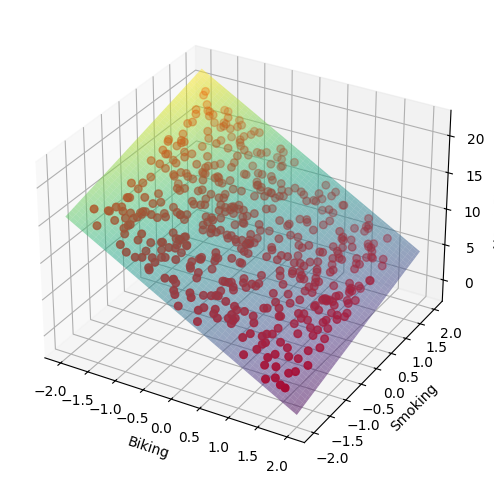

In [152]:
# Plotting the best fit plane
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')

# Generate grid
biking_grid, smoking_grid = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))
heart_disease_pred = w_best[0] + w_best[1] * biking_grid + w_best[2] * smoking_grid

# Plot surface
ax.plot_surface(biking_grid, smoking_grid, heart_disease_pred, alpha=0.5, cmap='viridis')

# Plot data points
ax.scatter(X[:, 1], X[:, 2], y, color='r', marker='o', s=30)

# Set labels
ax.set_xlabel('Biking')
ax.set_ylabel('Smoking')
ax.set_zlabel('Heart Disease')

plt.show()

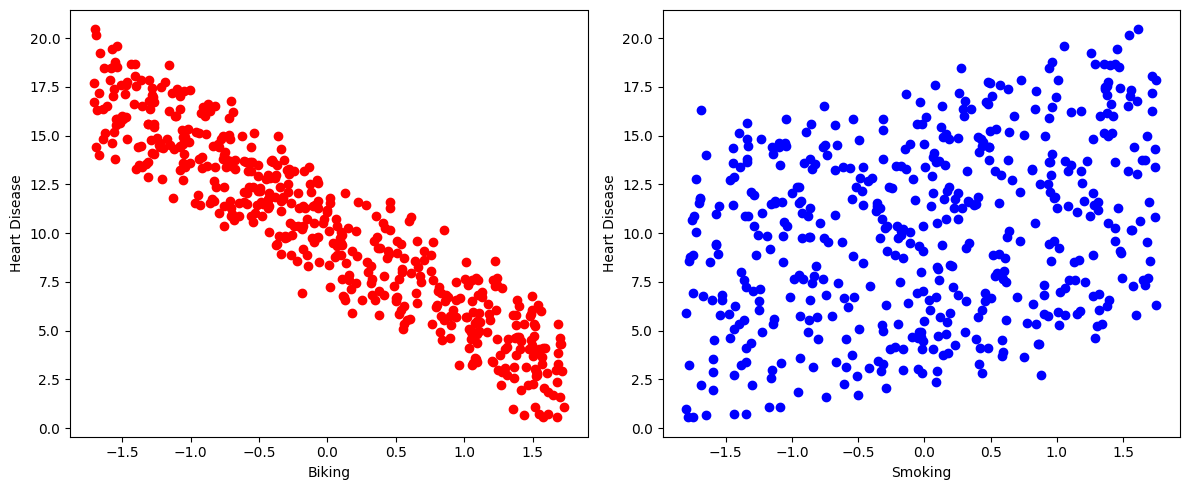

In [156]:
# Plotting Biking vs Heart Disease and Smoking vs Heart Disease
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 1], y, color='r', marker='o')
plt.xlabel('Biking')
plt.ylabel('Heart Disease')

plt.subplot(1, 2, 2)
plt.scatter(X[:, 2], y, color='b', marker='o')
plt.xlabel('Smoking')
plt.ylabel('Heart Disease')

plt.tight_layout()
plt.show()


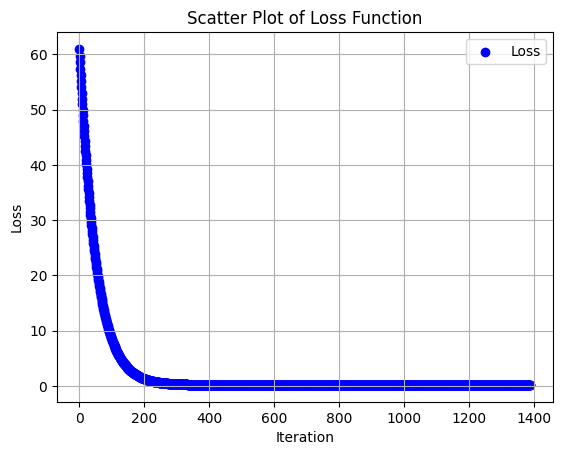

In [162]:
# Plotting the loss function as a scatter plot
iteration = range(len(cost_values))
plt.scatter(iteration, cost_values, c='b', marker='o', label='Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Scatter Plot of Loss Function')
plt.legend()
plt.grid(True)
plt.show()